In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
#from tensorflow.math import confusion_matrix

In [10]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


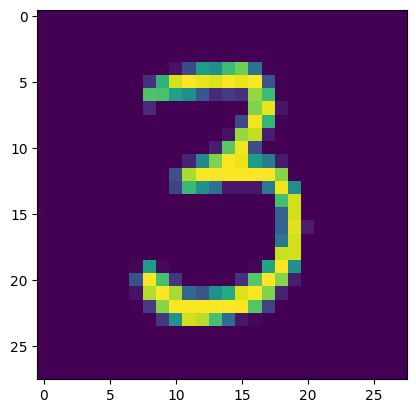

3


In [10]:
plt.imshow(X_train[50])
plt.show()
print(Y_train[50])

In [11]:
print(Y_test.shape, Y_train.shape)

(10000,) (60000,)


In [12]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [21]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [15]:
print(X_train[10])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'), #rectified linear unit
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  # 10 is the number of labels = number of neurons
])

In [23]:
model.compile(optimizer='adam',   #check for different optimizers and loss
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, epochs=10) #Epochs = how many times the neural network go thru the data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8484 - loss: 0.5204
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9547 - loss: 0.1508
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9668 - loss: 0.1102
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9743 - loss: 0.0863
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9793 - loss: 0.0694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9830 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9855 - loss: 0.0484
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0433
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9871 - loss: 0.0380
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0339


In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7454 - loss: 0.2872
0.7358999848365784
0.24452529847621918


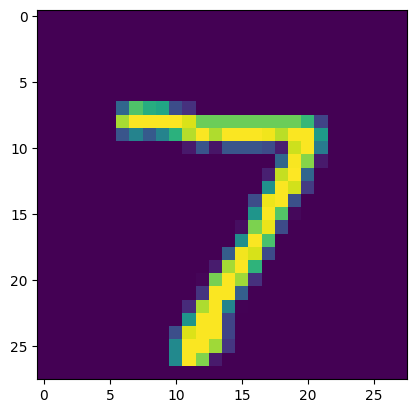

In [21]:
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [25]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
print(Y_pred.shape)
print(Y_pred[0])

(10000, 10)
[2.8433481e-01 2.0595692e-04 2.8471524e-01 9.9905604e-01 4.3086879e-05
 9.5324511e-05 3.6615093e-13 1.0000000e+00 5.3297620e-02 9.9972647e-01]


In [26]:
#converting prediction probabilities to class labels
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [26]:
#converting prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 4, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 3, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [7]:
!pip install --upgrade tensorflow


In [27]:
conf_mat = tf.math.confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 958    0    1    1    5    1    4    2    2    6]
 [   0 1112    2    4    0    1    4    6    5    1]
 [   3    0  997    5    2    0    2   10   12    1]
 [   0    0    2  991    1    2    0    7    3    4]
 [   0    0    4    0  971    0    2    2    1    2]
 [   2    2    0   45    2  830    5    2    4    0]
 [   2    2    1    1   10    8  930    0    4    0]
 [   0    0    8    6    4    0    0 1001    1    8]
 [   3    0    2   16    9    1    2    3  932    6]
 [   0    2    1   11   43    5    0    8    7  932]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

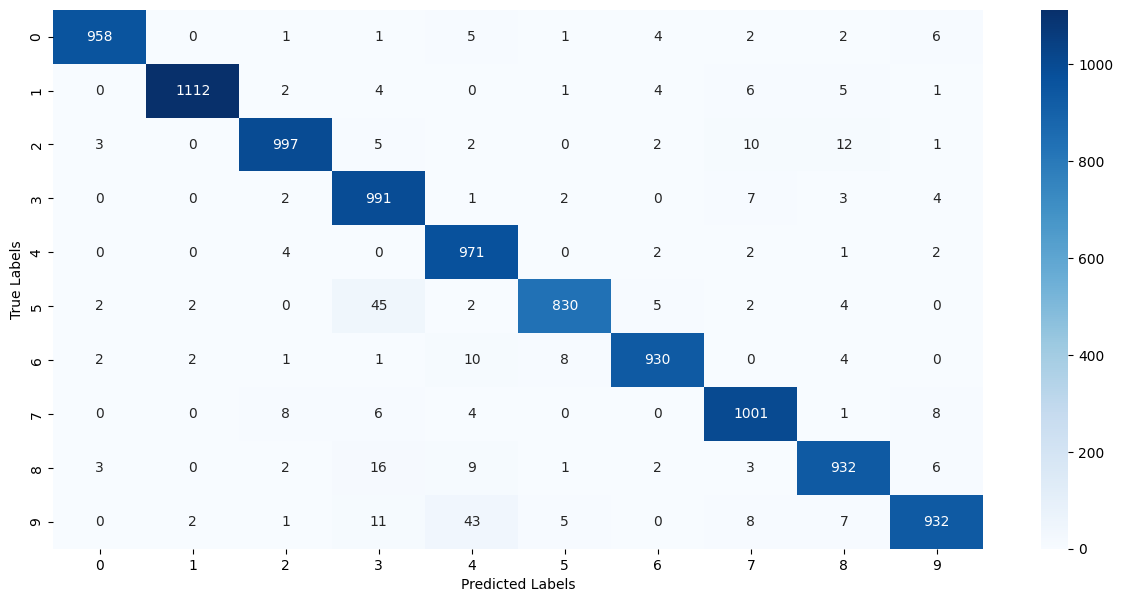

In [30]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [46]:
input_image_path = '/content/six.png'
input_image = cv2.imread(input_image_path)


In [32]:
type(input_image)

numpy.ndarray

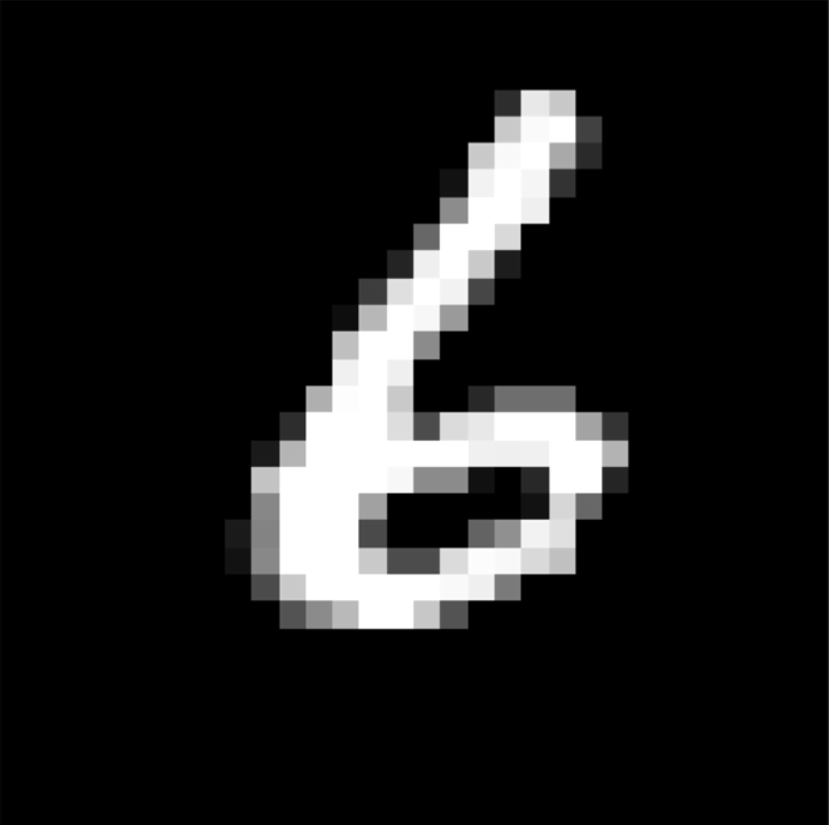

In [34]:
cv2_imshow(input_image)

In [35]:
input_image.shape

(825, 829, 3)

In [36]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [37]:
grayscale.shape

(825, 829)

In [38]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [39]:
input_image_resize.shape

(28, 28)

In [40]:
cv2_imshow(input_image_resize)

In [41]:
input_image_resize = input_image_resize/255

In [42]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])  #since only one image, first argument is 1 (image is of the form ndarray initially)

In [43]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
[[2.2506604e-02 3.4981279e-06 1.7354833e-01 8.6658373e-03 8.9500137e-02
  2.5396082e-01 9.9979520e-01 3.1363215e-06 3.5003788e-05 6.9792809e-06]]


In [44]:
input_pred_label = np.argmax(input_prediction)

In [45]:
print(input_pred_label)

6


input_image_path = '/content/six.png'

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

cv2_imshow(input_image_resize)

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognized as', input_pred_label)


In [52]:
input_image_path = '/content/nine.png'

input_image = cv2.imread(input_image_path)

#cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

cv2_imshow(input_image_resize)

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

#print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognized as', input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The handwritten digit is recognized as 9
